# Stock Price Prediction

#### Predict the closing stock price of a corporation using the past 60 day stock price. 
#### model use RNN LSTM

In [4]:
#Import Libraries
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/Users/mbuhliagah/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/mbuhliagah/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/mbuhliagah/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


### Get Stock quote

In [10]:
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2010-01-01', end='2020-08-17')

In [11]:
# exploaring Data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.604801
2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.616219
2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.510980
2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.498945
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.542150
...,...,...,...,...,...,...
2020-08-11,112.482498,109.107498,111.970001,109.375000,187902400.0,109.375000
2020-08-12,113.275002,110.297501,110.497498,113.010002,165944800.0,113.010002
2020-08-13,116.042503,113.927498,114.430000,115.010002,210082000.0,115.010002


In [12]:
df.shape

(2674, 6)

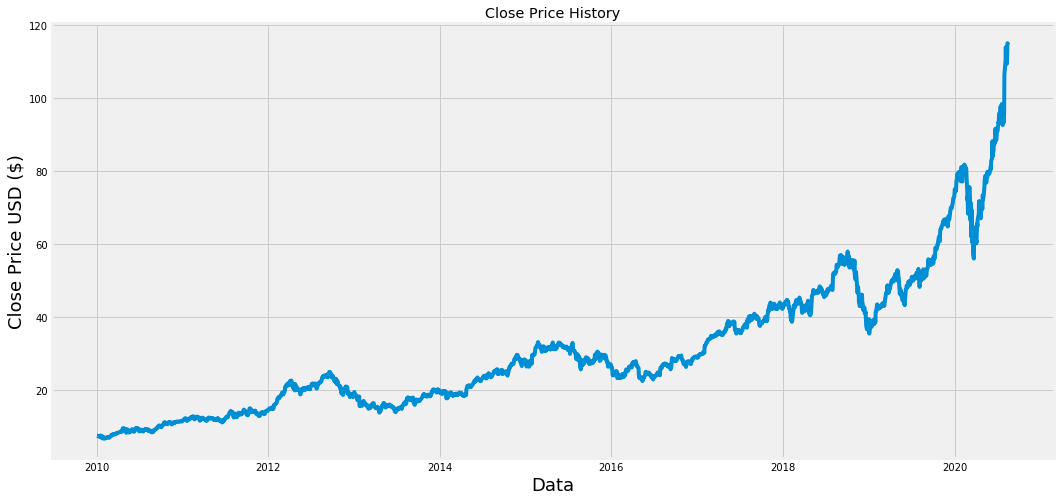

In [13]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [15]:
# Creating new dataframe with only the close column
data = df.filter(['Close'])
# Convert the dataframe to numpy array
dataset = data.values
#get the number of row to train the model on 
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

2140

In [16]:
#Scale Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00725176],
       [0.00737394],
       [0.00624787],
       ...,
       [1.        ],
       [0.99905224],
       [0.99627832]])

In [18]:
#create the training data set
train_data = scaled_data[0:training_data_len, :]
#split data
x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 60:
        print (x_train)
        print (y_train)
        print ()

[array([7.25175923e-03, 7.37394120e-03, 6.24787156e-03, 6.11908492e-03,
       6.58140294e-03, 5.96387960e-03, 5.17463927e-03, 6.14220126e-03,
       5.73932526e-03, 4.58353460e-03, 7.59189088e-03, 6.49884458e-03,
       5.29021657e-03, 1.88228663e-03, 3.63908895e-03, 4.58683694e-03,
       5.22747662e-03, 2.39083293e-03, 3.30233460e-06, 8.85003627e-04,
       1.25815862e-03, 2.37101892e-03, 0.00000000e+00, 1.12606964e-03,
       6.83565625e-04, 1.36713566e-03, 1.01379468e-03, 2.18609259e-03,
       2.75077858e-03, 3.74806159e-03, 3.46737196e-03, 3.59285627e-03,
       3.17677093e-03, 2.76398792e-03, 1.65442995e-03, 2.84324395e-03,
       3.28574797e-03, 4.15093759e-03, 5.59402695e-03, 5.54779426e-03,
       5.70630191e-03, 6.16201527e-03, 8.88307725e-03, 8.92600319e-03,
       1.02270966e-02, 1.08281038e-02, 1.10460579e-02, 1.14093059e-02,
       1.04978792e-02, 1.06993172e-02, 1.05903446e-02, 1.07653639e-02,
       9.97282121e-03, 1.07983872e-02, 1.19904992e-02, 1.23240305e-02,
     

In [20]:
# Convert the x-train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(2080, 60)

In [22]:
# reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [23]:
x_train.shape

(2080, 60, 1)

In [25]:
#Build The LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2080/2080 [==============================] - 56s 27ms/step - loss: 2.6995e-04
Epoch 2/5
2080/2080 [==============================] - 55s 27ms/step - loss: 1.0496e-04
Epoch 3/5
2080/2080 [==============================] - 55s 27ms/step - loss: 8.6643e-05
Epoch 4/5
2080/2080 [==============================] - 56s 27ms/step - loss: 6.5108e-05
Epoch 5/5
2080/2080 [==============================] - 55s 27ms/step - loss: 4.5118e-05


In [30]:
# Creating the testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

    

In [31]:
#convert data to a numpy array
x_test = np.array(x_test)

In [32]:
#reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [33]:
x_test.shape

(534, 60, 1)

In [34]:
# get the model predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [35]:
#get the root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.5487322932325499

/Users/mbuhliagah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


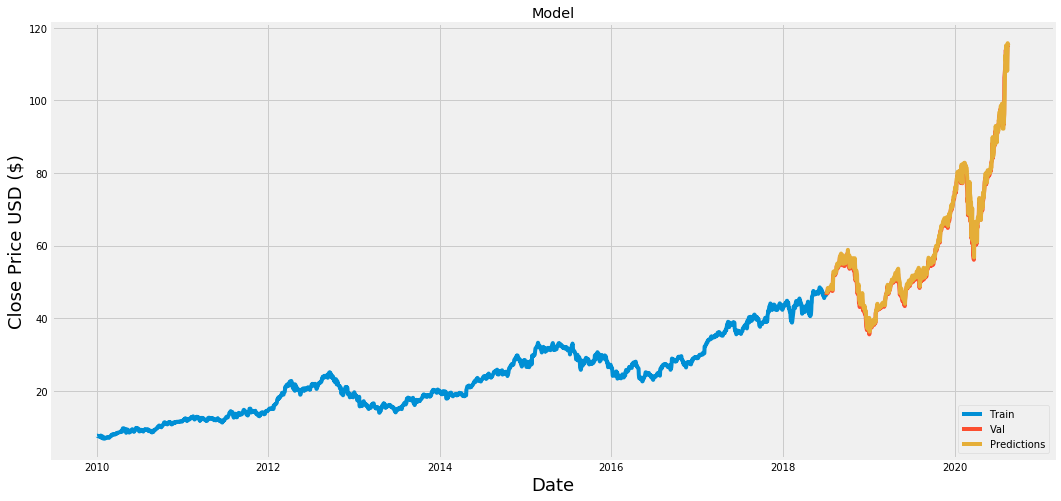

In [36]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc='lower right')
plt.show()

In [37]:
# show the valid and the predicted price 
valid

,Close,Predictions
Date,,
2018-07-05,46.349998,46.636269
2018-07-06,46.992500,46.875172
2018-07-09,47.645000,47.568016
2018-07-10,47.587502,48.297432
2018-07-11,46.970001,48.270420
...,...,...
2020-08-11,109.375000,112.531326
2020-08-12,113.010002,108.120834
2020-08-13,115.010002,113.066978
